The following work will present data cleaning, feature engineering, statistical analysis and visualization of the data.

### Import Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('transportation_data.csv', header = 0)

### Data Analysis

First, let's take a quick look at the data.

In [3]:
data.head(5)

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,1/2/2016,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,1/21/2016,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/2016,1/11/2016,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,1/29/2016,2/3/2016,2/3/2016,Toyota,Corolla,2016.0,2/3/2016
4,5,Strark,android web,Referral,1/10/2016,1/25/2016,1/26/2016,Hyundai,Sonata,2016.0,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54681 entries, 0 to 54680
Data columns (total 11 columns):
id                      54681 non-null int64
city_name               54681 non-null object
signup_os               47824 non-null object
signup_channel          54681 non-null object
signup_date             54681 non-null object
bgc_date                32896 non-null object
vehicle_added_date      13134 non-null object
vehicle_make            13223 non-null object
vehicle_model           13223 non-null object
vehicle_year            13223 non-null float64
first_completed_date    6137 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 4.6+ MB


Main information extracted from above analysis: 
    - Of the 54681 entries, only 6137 drivers completed their first trip, which accounts for 11% of the signed-up population.
    - Categorical data: city_name, signup_os, signup_channel, need to transform string data into numerical data
    - Only about 24% users provided vehicle information.

Let's do some data cleaning first, followed by some statistic analysis and visualization.

First, we will map categorical data into numberical data.

In [5]:
data['city_name'].value_counts()

Strark     29557
Berton     20117
Wrouver     5007
Name: city_name, dtype: int64

In [6]:
# map city_name into categorical value
data['city'] = data['city_name'].map({'Strark': 1, 'Berton': 2, 'Wrouver':3}) 

In [7]:
data['signup_os'].value_counts()

ios web        16632
android web    14944
windows         6776
mac             5824
other           3648
Name: signup_os, dtype: int64

In [8]:
data['signup_os'].count()

47824

In [9]:
data['signup_os']

0            ios web
1            windows
2            windows
3        android web
4        android web
5        android web
6            ios web
7            ios web
8                NaN
9            ios web
10           ios web
11               mac
12       android web
13           ios web
14           windows
15           windows
16           ios web
17       android web
18           ios web
19           ios web
20           ios web
21           ios web
22           ios web
23             other
24               mac
25           windows
26       android web
27               NaN
28       android web
29       android web
            ...     
54651          other
54652            NaN
54653          other
54654            NaN
54655        ios web
54656        ios web
54657            NaN
54658    android web
54659        ios web
54660    android web
54661    android web
54662            NaN
54663          other
54664        ios web
54665            NaN
54666            NaN
54667        

Map signup_os to numerical values.

In [10]:
data['os'] = data['signup_os'].map({'ios web': 1, 'android web': 2, 'windows': 3, 'mac':4, 'other':5}) 
data = data.drop(['signup_os'], axis = 1)

In [11]:
data['signup_channel'].value_counts()

Paid        23938
Referral    17316
Organic     13427
Name: signup_channel, dtype: int64

Map signup_os to numerical values.

In [12]:
data['channel'] = data['signup_channel'].map({'Paid':1, 'Organic':2, 'Referral':3})

In [13]:
data = data.drop(['city_name', 'signup_channel'], axis = 1)

Next, we will convert bgc_date, vehicle_added_date and first completed date into lag time after signup_date.

In [14]:
data['signup'] = pd.to_datetime(data['signup_date'])
data['first_completed'] = pd.to_datetime(data['first_completed_date'])
data['bgc'] = pd.to_datetime(data['bgc_date'])
data['vehicle_added'] = pd.to_datetime(data['vehicle_added_date'])

In [15]:
data['signup_bgc'] = data['bgc'].sub(data['signup']).astype('timedelta64[D]')
data['signup_vehicle_added'] = data['vehicle_added'].sub(data['signup']).astype('timedelta64[D]')
data['signup_first_completed'] = data['first_completed'].sub(data['signup']).astype('timedelta64[D]')
data['bgc_vehicle_added'] = data['vehicle_added'].sub(data['bgc']).astype('timedelta64[D]')

data['completed'] = data['first_completed'].map(lambda x: 0 if x is pd.tslib.NaT else 1)  
data = data.drop(['signup_date', 'first_completed_date', 'bgc_date', 'vehicle_added_date', 'first_completed', 'bgc', 'vehicle_added'], axis = 1)

In [16]:
data.head(5)

,id,vehicle_make,vehicle_model,vehicle_year,city,os,channel,signup,signup_bgc,signup_vehicle_added,signup_first_completed,bgc_vehicle_added,completed
0,1,NaN,NaN,NaN,1,1.0,1,2016-01-02,NaN,NaN,NaN,NaN,0
1,2,NaN,NaN,NaN,1,3.0,1,2016-01-21,NaN,NaN,NaN,NaN,0
2,3,NaN,NaN,NaN,3,3.0,2,2016-01-11,0.0,NaN,NaN,NaN,0
3,4,Toyota,Corolla,2016.0,2,2.0,3,2016-01-29,5.0,5.0,5.0,0.0,1
4,5,Hyundai,Sonata,2016.0,1,2.0,3,2016-01-10,15.0,16.0,NaN,1.0,0


Next, let's check the values of vehicle_make, vehicle_model.

In [17]:
data['vehicle_make'].value_counts()

Toyota           3219
Honda            1845
Nissan           1311
Ford              778
Hyundai           677
Chevrolet         665
Kia               584
Volkswagen        503
Dodge             393
Mercedes-Benz     348
Lexus             335
BMW               330
Mazda             292
Subaru            221
Jeep              203
Chrysler          202
Acura             190
Scion             164
Infiniti          147
Audi              144
Mitsubishi        113
GMC                89
Cadillac           86
Lincoln            70
Volvo              57
Buick              46
Saturn             30
Pontiac            30
Land Rover         20
Mini               20
Jaguar             15
Tesla              13
Suzuki             12
Fiat               11
Porsche            10
Mercury             9
Autobot             8
Hummer              7
Saab                7
Bike                6
Bicycle             5
Isuzu               2
Bentley             2
Maserati            2
Walker              1
Oldsmobile

Not sure how this is related to 'completion'.

In [18]:
data['vehicle_model'].value_counts()

Civic                   689
Corolla                 688
Camry                   683
Accord                  595
Prius V                 522
Altima                  422
Prius                   369
Sentra                  330
Sonata                  259
Elantra                 255
Optima                  212
Jetta                   205
CR-V                    193
Versa                   192
RAV4                    189
Fusion                  186
3-series                163
Focus                   158
Sienna                  154
MAZDA3                  146
C-Class                 145
Malibu                  127
Passat                  120
Prius C                 118
Soul                    117
Odyssey                 113
Cruze                   109
Escape                  107
Highlander              106
Rogue                   103
                       ... 
Bravada                   1
6-series Gran Coupe       1
Monterey                  1
ZDX                       1
Veloster            

Not sure how this is related to 'completion'.

In [20]:
data['vehicle_year'].value_counts()

2015.0    2402
2014.0    1655
2013.0    1451
2016.0    1150
2012.0    1122
2007.0     711
2011.0     702
2008.0     659
2010.0     645
2006.0     550
2009.0     513
2005.0     450
2004.0     369
2003.0     350
2002.0     251
2001.0     169
2000.0      29
1999.0      14
1998.0      10
1997.0       6
2017.0       6
1996.0       4
0.0          4
1995.0       1
Name: vehicle_year, dtype: int64

Intuitively, vehicle_year gives us information about how old the vehicle is while vehicle_model and vehicle_maker doesn't give any direct information about the condition of the vehicle. Thus, let's not consider vehicle_model and vehicle_maker for now.
We also need to drop the id column.

In [22]:
data = data.drop(['vehicle_model','vehicle_make', 'id','signup'], axis = 1)

In [23]:
data.head(5)

,vehicle_year,city,os,channel,signup_bgc,signup_vehicle_added,signup_first_completed,bgc_vehicle_added,completed
0,NaN,1,1.0,1,NaN,NaN,NaN,NaN,0
1,NaN,1,3.0,1,NaN,NaN,NaN,NaN,0
2,NaN,3,3.0,2,0.0,NaN,NaN,NaN,0
3,2016.0,2,2.0,3,5.0,5.0,5.0,0.0,1
4,2016.0,1,2.0,3,15.0,16.0,NaN,1.0,0


### Data Visualization

Let's first visualize the over distribution of all numerical features for all drivers. 

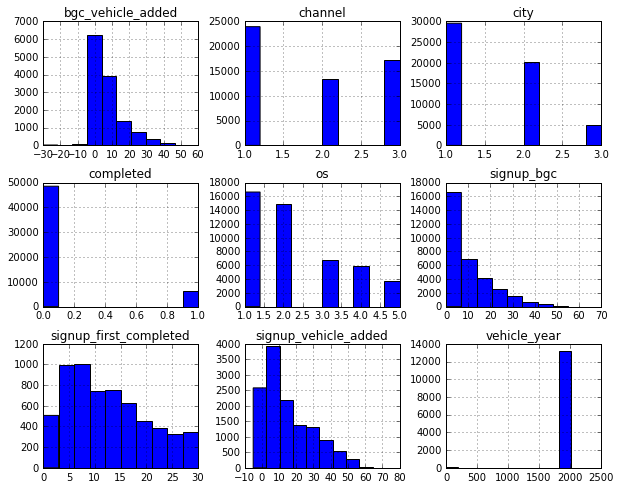

In [24]:
import matplotlib.pyplot as plt
data.hist(figsize = (10, 8)) # default bin size = 10
plt.show()

We can tell all drivers who completed their first trip did so within 30 days after signup.
Vehicle_year contains some invalid values smaller than 500. This required data cleaning which we will show later.

Next, let's visualize the distribution of drivers who completed their first trip and who haven't statistically.

Let's start with the distribution across three cities.

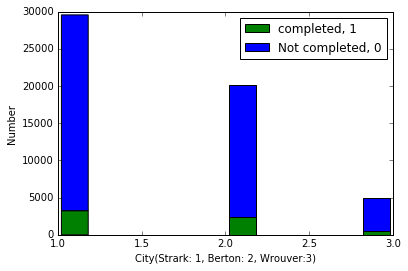

0    0.890415
1    0.109585
Name: completed, dtype: float64 0    0.878859
1    0.121141
Name: completed, dtype: float64 0    0.907929
1    0.092071
Name: completed, dtype: float64


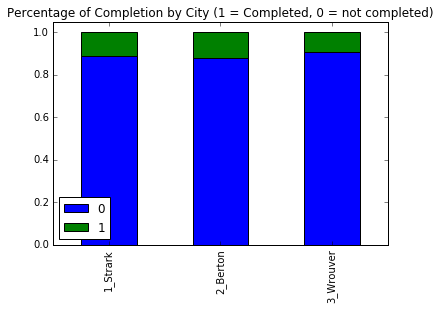

In [25]:
# city distribution for two types of drivers
plt.hist([data[data['completed'] == 1]['city'], data[data['completed'] == 0]['city']], stacked = True, 
         color = ['g','b'], label = ['completed, 1', 'Not completed, 0'])
plt.legend()
plt.xlabel('City(Strark: 1, Berton: 2, Wrouver:3)')
plt.ylabel('Number')
plt.show()

city1, city2, city3 = data.groupby('city').size()
Pcity1 = data[data['city'] == 1]['completed'].value_counts()/float(city1)
Pcity2 = data[data['city'] == 2]['completed'].value_counts()/float(city2)
Pcity3 = data[data['city'] == 3]['completed'].value_counts()/float(city3)
df = pd.DataFrame([Pcity1, Pcity2, Pcity3])
df.index = ['1_Strark','2_Berton', '3_Wrouver']
df.plot(kind = 'bar',stacked = True, ylim = (0, 1.05), title = "Percentage of Completion by City (1 = Completed, 0 = not completed)")
print(Pcity1, Pcity2, Pcity3)

Insights from the above data:
- 1, City Strark has the largest population of signed-up drivers for this transportation app, followed by city Berton and Wrouver.
- 2, Percentage of completed drivers among all signed-up drivers: Strark: 11.0%, Berton: 12.1%, Wrouver: 9.2%. These percentage
     differences are quite minor.
     
Next, let's explore the distributions among three different channels.

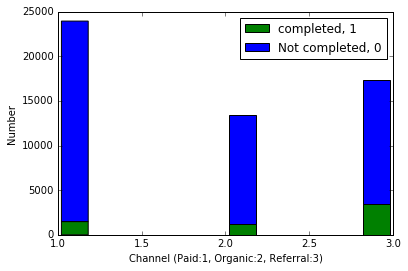

0    0.93809
1    0.06191
Name: completed, dtype: float64 0    0.909883
1    0.090117
Name: completed, dtype: float64 0    0.801051
1    0.198949
Name: completed, dtype: float64


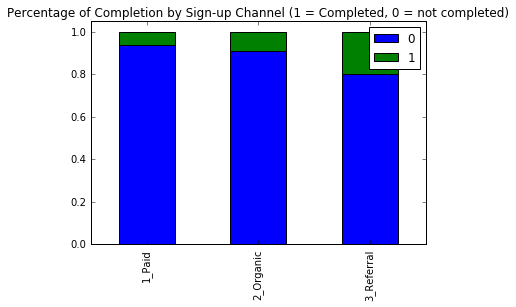

In [26]:
# Channel distribution for two types of drivers
plt.hist([data[data['completed'] == 1]['channel'], data[data['completed'] == 0]['channel']], stacked = True, 
         color = ['g','b'], label = ['completed, 1', 'Not completed, 0'])
plt.legend()
plt.xlabel('Channel (Paid:1, Organic:2, Referral:3)')
plt.ylabel('Number')
plt.show()

channel1, channel2, channel3 = data.groupby('channel').size()
Pchannel1 = data[data['channel'] == 1]['completed'].value_counts()/float(channel1)
Pchannel2 = data[data['channel'] == 2]['completed'].value_counts()/float(channel2)
Pchannel3 = data[data['channel'] == 3]['completed'].value_counts()/float(channel3)
df = pd.DataFrame([Pchannel1, Pchannel2, Pchannel3])
df.index = ['1_Paid','2_Organic', '3_Referral']
df.plot(kind = 'bar', stacked = True, ylim = (0, 1.05), title = "Percentage of Completion by Sign-up Channel (1 = Completed, 0 = not completed)")
print(Pchannel1, Pchannel2, Pchannel3)

Insights from the above data:

- 1, Most drivers signed up for this transportation app by paid method, followed by referral and organic method.
- 2, Percentage of completed drivers among three different sign-up methods: Referral: 19.9%, Organic: 9.0%, Paid: 6.2%. 
     These percentage differences are quite significant.
    
Next, let's explore the distributions among different sign-up operating systems.

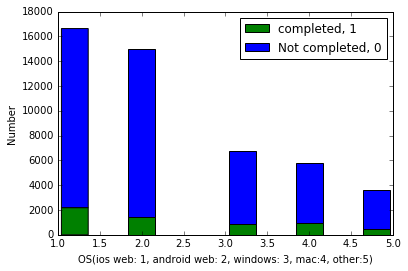

0    0.868266
1    0.131734
Name: completed, dtype: float64 0    0.902703
1    0.097297
Name: completed, dtype: float64 0    0.867473
1    0.132527
Name: completed, dtype: float64 0    0.837225
1    0.162775
Name: completed, dtype: float64 0    0.863487
1    0.136513
Name: completed, dtype: float64


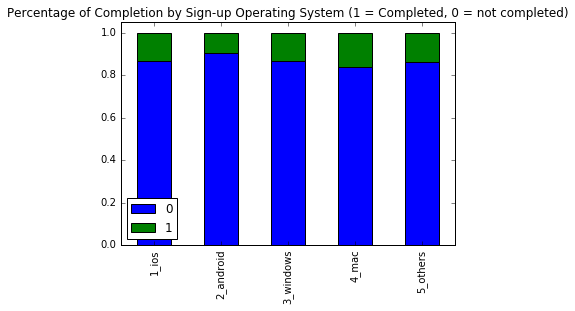

In [27]:
# OS distribution for two types of drivers
# remember to use .dropna() since hist doesn't take in NaN value.
plt.hist([data[data['completed'] == 1]['os'].dropna(), data[data['completed'] == 0]['os'].dropna()], stacked = True, 
         color = ['g','b'], label = ['completed, 1', 'Not completed, 0'])
plt.legend()
plt.xlabel('OS(ios web: 1, android web: 2, windows: 3, mac:4, other:5)')
plt.ylabel('Number')
plt.show()

ios1, android2, windows3, mac4, others5 = data.groupby('os').size()
Pios1 = data[data['os'] == 1]['completed'].value_counts()/float(ios1)
Pandroid2 = data[data['os'] == 2]['completed'].value_counts()/float(android2)
Pwindows3 = data[data['os'] == 3]['completed'].value_counts()/float(windows3)
Pmac4 = data[data['os'] == 4]['completed'].value_counts()/float(mac4)
Pothers5 = data[data['os'] == 5]['completed'].value_counts()/float(others5)

df = pd.DataFrame([Pios1, Pandroid2, Pwindows3, Pmac4, Pothers5])
df.index = ['1_ios','2_android', '3_windows', '4_mac', '5_others']
df.plot(kind = 'bar', stacked = True, ylim = (0, 1.05), title = "Percentage of Completion by Sign-up Operating System (1 = Completed, 0 = not completed)")

print(Pios1, Pandroid2, Pwindows3, Pmac4, Pothers5)

Insights from the above data:

- 1, Most drivers signed up for this transportation app by ios web and android web, followed by windows, mac and other method.
- 2, Percentage of completed drivers among all these different sign-up methods: mac: 16.3%, windows: 13.3%, ios web: 13.2%, android web: 9.7%,  others: 13.7%. 

Next, let's explore vehicle year.

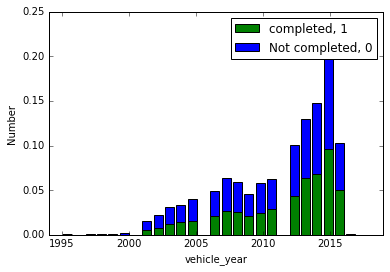

In [28]:
# vehicle year distribution for two types of drivers
df1 = data[data['completed'] == 1]['vehicle_year'].dropna()
df0 = data[data['completed'] == 0]['vehicle_year'].dropna()
df1 = df1[df1 >= 1994]
df0 = df0[df0 >= 1994]

plt.hist([df1, df0], stacked = True, color = ['g','b'], bins = 26, label = ['completed, 1', 'Not completed, 0'], normed = True, log = False)
plt.legend()
plt.xlim(1994, 2019)
plt.xlabel('vehicle_year')
plt.ylabel('Number')
plt.show()

Insight from above data:
    - Those with vehicles from 2017 or before 1998 didn't complete their first trip.
    - Those with vehicles from 2005 to 2015 are most likely to complete their first trip.

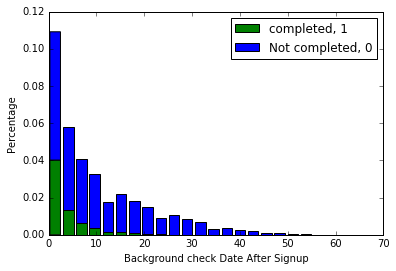

In [29]:
# Analyze signup - bgc time gap
df1 = data[data['completed'] == 1]['signup_bgc'].dropna()
df0 = data[data['completed'] == 0]['signup_bgc'].dropna()

plt.hist([df1, df0], stacked = True, bins = 25, color = ['g','b'], label = ['completed, 1', 'Not completed, 0'], normed = True, log = False)
plt.legend()
plt.xlabel('Background check Date After Signup')
plt.ylabel('Percentage')
plt.show()

Most user who completed their first trip finished their background check within 20 days after signing up.

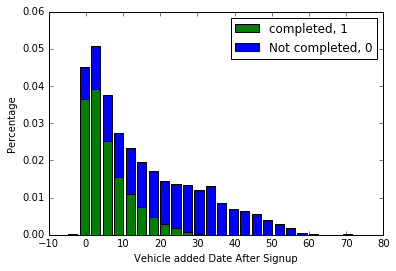

In [257]:
# Analyze signup_vehicle_added
df1 = data[data['completed'] == 1]['signup_vehicle_added'].dropna()
df0 = data[data['completed'] == 0]['signup_vehicle_added'].dropna()

plt.hist([df1, df0], stacked = True, bins = 25, color = ['g','b'], label = ['completed, 1', 'Not completed, 0'], normed = True, log = False)
plt.legend()
plt.xlabel('Vehicle added Date After Signup')
plt.ylabel('Percentage')
plt.show()

Most user who completed their first trip added their vehicle information within 20 days after signing up.

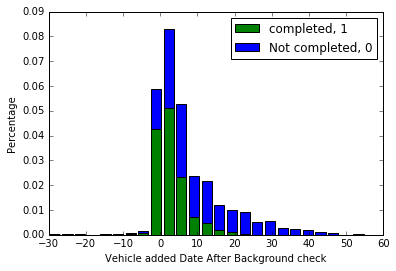

In [30]:
# Analyze bgc_vehicle_added
df1 = data[data['completed'] == 1]['bgc_vehicle_added'].dropna()
df0 = data[data['completed'] == 0]['bgc_vehicle_added'].dropna()

plt.hist([df1, df0], stacked = True, bins = 25, color = ['g','b'], label = ['completed, 1', 'Not completed, 0'], normed = True, log = False)
plt.legend()
plt.xlabel('Vehicle added Date After Background check')
plt.ylabel('Percentage')
plt.show()

Most user who completed their first trip added their vehicle information within 10 days after background check.

# Summary

- Signed-up drivers from city Berton and Strark are more likely to complete their first trip than those signup from city Wrouver.
  - Percentage of completed drivers among all signed-up drivers: Strark: 11.0%, Berton: 12.1%, Wrouver: 9.2%.

- Drivers signed up from mac are more likely and those signed up from android web are less likely to complete their first trip 
  compared to the average.
  - Percentage of completed drivers among all these different sign-up methods: mac: 16.3%, windows: 13.3%, ios web: 13.2%, android
  web: 9.7%, others: 13.7%.

- Drivers signed up by referral are two and three times more likely to complete their first trip compared to those signed up by 
  organic or paid method, respectively.
  - Percentage of completed drivers among three different sign-up methods: Referral: 19.9%, Organic: 9.0%, Paid: 6.2%.                 

- Drivers with signed-up vehicles from 2017 or before 1998 are less likely to complete their first trip than those with vehicles 
  between 2005 and 2015.
    
- Drivers who finished their background check within 20 days after signing up and added their vehicle information within 10 days 
after background check are more likely to complete their first trip.                                                                        